## Assignemnt 2 Zhengxi Shen

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Columia/APAN 5420/purchase_credit_card.csv')

df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


## Explore the dataframe

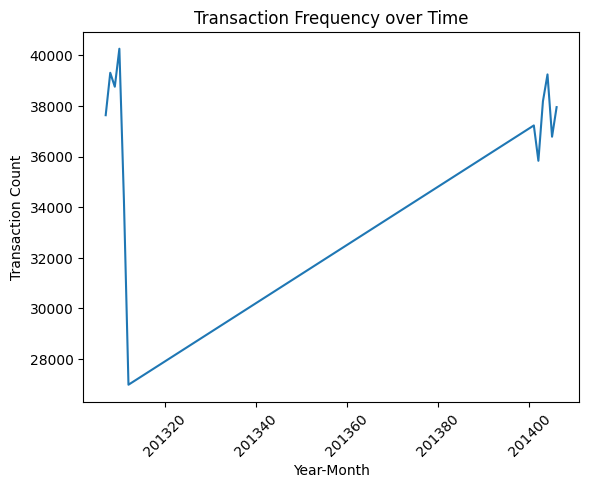

In [34]:
# Group the data by Year-Month and calculate the transaction count
monthly_transaction_count = df.groupby('Year-Month')['Agency Number'].count()

# Plot a line plot of transaction frequency by month
plt.plot(monthly_transaction_count.index, monthly_transaction_count.values)
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.title('Transaction Frequency over Time')
plt.xticks(rotation=45)
plt.show()

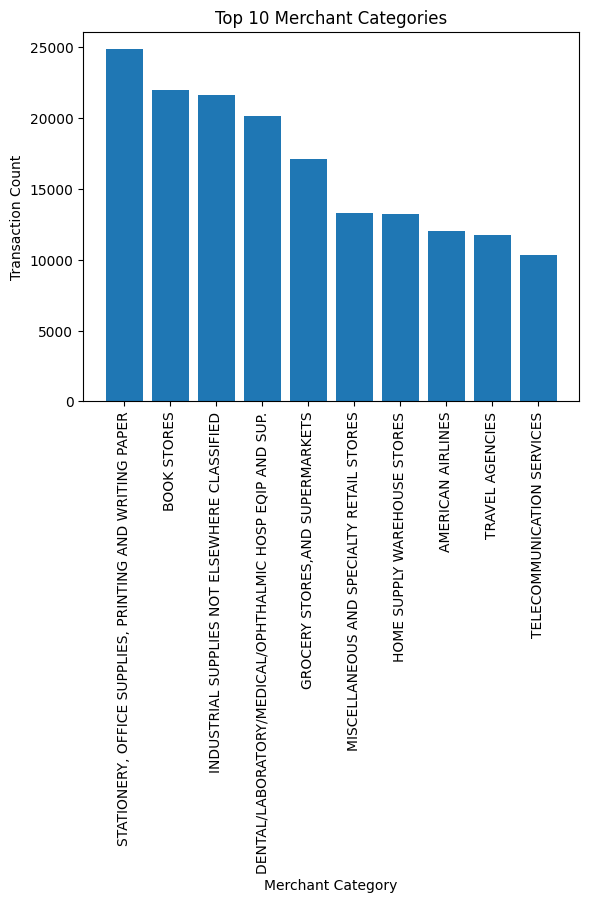

In [36]:
# Get the top 10 most common merchant categories
top_merchant_categories = df['Merchant Category Code (MCC)'].value_counts().head(10)

# Plot a bar plot of the top 10 merchant categories
plt.bar(top_merchant_categories.index, top_merchant_categories.values)
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Count')
plt.title('Top 10 Merchant Categories')
plt.xticks(rotation=90)
plt.show()

In [29]:
df['Vendor'].value_counts()

STAPLES                      14842
AMAZON MKTPLACE PMTS         12197
WW GRAINGER                  12076
Amazon.com                   10766
BILL WARREN OFFICE PRODUC     4479
                             ...  
AMERICAN AI 0017369561070        1
AMERICAN AI 0017369561061        1
AMERICAN AI 0017369561082        1
UNITED      0167369561044        1
GENERATOR AND MOTOR SERVI        1
Name: Vendor, Length: 86729, dtype: int64

In [30]:
(df['Vendor'].value_counts() > 1).value_counts()

False    65049
True     21680
Name: Vendor, dtype: int64

In [6]:
df.columns

Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')

## Begin to create fraud detection features

#### 1. Monthly Average Transaction Frequency of each cardholder

In [7]:
# Convert 'Year-Month' column to datetime format
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y%m')

# Calculate Transaction Frequency per month
transaction_frequency = df.groupby(['Cardholder Last Name', pd.Grouper(key='Year-Month', freq='M')]).size().reset_index()
transaction_frequency.columns = ['Cardholder Last Name', 'Year-Month', 'Transaction_Frequency']

# Calculate Average Monthly Transaction Frequency per cardholder
average_monthly_frequency = transaction_frequency.groupby('Cardholder Last Name')['Transaction_Frequency'].mean().reset_index()
average_monthly_frequency.columns = ['Cardholder Last Name', 'Average_Monthly_Frequency']

# Merge the Average Monthly Frequency into the original dataframe
df_new = pd.merge(df, average_monthly_frequency, on='Cardholder Last Name', how='left')

In [8]:
df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,20.818182
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,20.818182
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,24.250000
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",24.250000
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",5.916667


#### About this feature:
##### The 'Average_Monthly_Frequency' feature can help detect fraud transactions by identifying unusual patterns of transaction activity for each cardholder. By calculating the average number of transactions made per month by a cardholder, we establish their normal spending behavior. Any significant deviation from this average can be indicative of fraudulent activity. For instance, abnormally high transaction frequencies may suggest an individual is engaging in excessive or unauthorized transactions. Conversely, unexpectedly low frequencies could indicate account takeover or compromised cards.

#### 2. Deviation of Average Monthly Transaction Frequency of each Cardholder

In [9]:
# Convert 'Year-Month' column to datetime format
df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y%m')

# Calculate Transaction Amount Deviation per cardholder per month
transaction_amount_deviation = df.groupby(['Cardholder Last Name', pd.Grouper(key='Year-Month', freq='M')])['Amount'].std().reset_index()
transaction_amount_deviation.columns = ['Cardholder Last Name', 'Year-Month', 'Transaction_Amount_Deviation']

# Calculate Average Transaction Amount Deviation per cardholder
average_transaction_amount_deviation = transaction_amount_deviation.groupby('Cardholder Last Name')['Transaction_Amount_Deviation'].mean().reset_index()
average_transaction_amount_deviation.columns = ['Cardholder Last Name', 'Average_Transaction_Amount_Deviation']

# Merge the Average Transaction Amount Deviation into the original dataframe
df_new = pd.merge(df_new, average_transaction_amount_deviation, on='Cardholder Last Name', how='left')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,20.818182,241.780675
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,20.818182,241.780675
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,24.250000,569.013452
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",24.250000,569.013452
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",5.916667,135.351171


#### About this feature:
##### This feature can help in detecting fraud transactions by identifying abnormal patterns in transaction amounts for each cardholder. By calculating the standard deviation of transaction amounts, we capture the degree of variation from the average transaction amount for a particular cardholder. Higher standard deviations indicate a wider range of transaction amounts, which can potentially indicate outliers and suspicious activity. Fraudulent transactions often involve unusual or extreme transaction amounts that deviate significantly from the cardholder's normal spending behavior.

#### 3. Time since Last Transaction

In [10]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df_new['Transaction Date'])

# Sort the dataframe by 'Cardholder Last Name' and 'Transaction Date' in ascending order
df_new.sort_values(['Cardholder Last Name', 'Transaction Date'], inplace=True)

# Calculate the time difference in minutes between the current and previous transaction for each cardholder
df_new['Time since Last Transaction'] = (df_new.groupby('Cardholder Last Name')['Transaction Date'].diff().dt.total_seconds() / 60).fillna(0)

# Apply the threshold of 5 minutes to identify large gaps between transactions
df_new['Transaction Gap > 5 min'] = df_new['Time since Last Transaction'].apply(lambda x: 1 if x >= 5 else 0)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Gap > 5 min
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,0
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,1
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,1
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,1


#### About this feature:
##### This feature can assist in detecting fraud by identifying transactions that occur too frequently, indicated by gaps of less than 5 minutes between transactions for each cardholder. Unusually frequent transactions may be an indicator of fraudulent activity, such as card cloning or automated transactions. By calculating the time difference between consecutive transactions, we can identify cardholders who engage in rapid, suspicious transaction patterns. Large gaps between transactions are considered normal, while very short intervals suggest abnormal and potentially fraudulent behavior.

#### 4. Transaction Rank per Cardholder

In [11]:
import pandas as pd

# Calculate the Transaction Amount Rank within each cardholder's transaction history
df_new['Transaction Amount Rank'] = df_new.groupby('Cardholder Last Name')['Amount'].rank(ascending=True, method='min')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Gap > 5 min,Transaction Amount Rank
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,0,1.0
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,0,7.0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,1,10.0
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,1,6.0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,1,9.0


#### About this feature:
##### This feature can be valuable in detecting fraud by identifying transactions that rank unusually high within a cardholder's transaction history. Anomalously high-ranked transaction amounts, especially if they consistently appear within the top few ranks, may indicate potential fraudulent behavior. For instance, if a new transaction consistently ranks among the top 3 transaction amounts for a cardholder, it could be an indicator of fraudulent activity such as unauthorized large purchases or identity theft.

#### 5. Transaction Amount Percentile per Cardholder

In [12]:
# Calculate the Transaction Amount Percentile within each cardholder's transaction history
df_new['Transaction Amount Percentile'] = df_new.groupby('Cardholder Last Name')['Amount'].rank(pct=True)

# Set the high and low percentile thresholds
high_percentile_threshold = 0.95  # Example: 95th percentile
low_percentile_threshold = 0.05   # Example: 5th percentile

# Identify transactions with unusually high or low percentiles
df_new['Is Unusual Transaction_Amount Percentile'] = np.where((df_new['Transaction Amount Percentile'] >= high_percentile_threshold) |
                                       (df_new['Transaction Amount Percentile'] <= low_percentile_threshold), 1, 0)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Gap > 5 min,Transaction Amount Rank,Transaction Amount Percentile,Is Unusual Transaction_Amount Percentile
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,0,1.0,1.0,1
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,0,7.0,0.7,0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,1,10.0,1.0,1
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,1,6.0,0.6,0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,1,9.0,0.9,0


#### About this feature:
##### This feature aids in detecting fraud transactions by quantifying the relative position of each transaction amount within a cardholder's transaction history. Unusually high or low percentiles indicate transaction amounts that deviate significantly from the norm. By setting appropriate thresholds, such as the 95th and 5th percentiles, transactions with percentiles above the high threshold or below the low threshold can be flagged as potentially fraudulent. For instance, transactions ranking within the top 5% or bottom 5% of all transaction amounts could signify suspicious activities, such as large-scale fraudulent purchases or unauthorized transactions. 

#### 6. Odd-hour transaction

In [15]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Extract the hour component from the 'Transaction Date' column
df_new['Transaction Hour'] = df_new['Transaction Date'].dt.hour

# Create the 'Odd-Hour Transactions' feature
# Here I use 5am. and 11pm. as a sample range of abnormal transaction hours, this may change in real life senario
# For this dataset, all the transaction times were set at 12am, so the feature may not work very well, but it is valuable when 
#   transaction time is the exact second cardholder purchase
df_new['Odd-Hour Transactions'] = df_new['Transaction Hour'].apply(lambda x: 1 if x < 5 or x > 23 else 0)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Average_Monthly_Frequency,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Gap > 5 min,Transaction Amount Rank,Transaction Amount Percentile,Is Unusual Transaction_Amount Percentile,Transaction Hour,Odd-Hour Transactions
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,OTHER FEES,1.000000,NaN,0.0,0,1.0,1.0,1,0,1
95546,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,16.90,PURCHASE FINANCE CHARGE,2013-07-15,07/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,0.0,0,7.0,0.7,0,0,1
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,14400.0,1,10.0,1.0,1,0,1
95614,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,14.53,PURCHASE FINANCE CHARGE,2013-08-15,08/15/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,30240.0,1,6.0,0.6,0,0,1
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,OTHER FEES,1.666667,492.220566,15840.0,1,9.0,0.9,0,0,1


#### About this feature:
##### This feature can aid in detecting fraud transactions by identifying transactions that occur during unusual hours, such as late at night or early in the morning. Unusual transaction timing may indicate potentially fraudulent activity, as fraudsters often take advantage of off-peak hours when monitoring and security measures may be less stringent. By flagging transactions occurring during odd hours, the feature helps highlight suspicious patterns that may warrant further investigation. 

#### 7. Frequent transactions to same vendor from same cardholder

In [17]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Sort the dataframe by 'Cardholder Last Name', 'Vendor', and 'Transaction Date' in ascending order
df_new.sort_values(['Cardholder Last Name', 'Vendor', 'Transaction Date'], inplace=True)

# Calculate the time difference in minutes between consecutive transactions for the same cardholder to the same vendor
df_new['Time since Last Transaction (Cardholder-Vendor)'] = df_new.groupby(['Cardholder Last Name', 'Vendor'])['Transaction Date'].diff().dt.total_seconds() / 60

# Set the time period threshold for transaction recurrence 
# I use 5 minutes as threshold here as an esample, can be changed based on real life senario
recurrence_time_threshold = 5

# Create the 'Transaction Recurrence' feature
df_new['Transaction Recurrence'] = df_new['Time since Last Transaction (Cardholder-Vendor)'].apply(lambda x: 1 if x <= recurrence_time_threshold else 0)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Average_Transaction_Amount_Deviation,Time since Last Transaction,Transaction Gap > 5 min,Transaction Amount Rank,Transaction Amount Percentile,Is Unusual Transaction_Amount Percentile,Transaction Hour,Odd-Hour Transactions,Time since Last Transaction (Cardholder-Vendor),Transaction Recurrence
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,NaN,0.0,0,1.0,1.0,1,0,1,NaN,0
297113,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,492.220566,83520.0,1,1.0,0.1,0,0,1,NaN,0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,492.220566,14400.0,1,10.0,1.0,1,0,1,NaN,0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,492.220566,15840.0,1,9.0,0.9,0,0,1,46080.0,0
95855,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,492.220566,18720.0,1,8.0,0.8,0,0,1,175680.0,0


#### About this feature:
##### This feature is valuable in detecting fraud transactions by identifying repetitive transactions within a short time period involving the same cardholder and vendor. Fraudsters often conduct multiple transactions in quick succession to maximize their fraudulent gains. By flagging transactions that recur within a specified time threshold, this feature helps identify potentially suspicious behavior. Frequent repetitive transactions may indicate fraudulent activities such as unauthorized purchases, account takeovers, or the use of stolen cards. 

#### 8. Uncommon Merchant Category

In [18]:
# Define the threshold to measure uncommon merchant categories
# I use 5 times as a threshold for uncommon catgories here, it can be changed to a ratio or other number by domian knowledge
uncommon_threshold = 5

# Calculate the count of transactions for each merchant category
merchant_category_count = df_new['Merchant Category Code (MCC)'].value_counts().reset_index()
merchant_category_count.columns = ['Merchant Category Code (MCC)', 'Merchant Category Count']

# Create the 'Uncommon Merchant Category' feature
df_new['Uncommon Merchant Category'] = df_new['Merchant Category Code (MCC)'].apply(
    lambda x: 1 if merchant_category_count.loc[merchant_category_count['Merchant Category Code (MCC)'] == x, 'Merchant Category Count'].values[0] < uncommon_threshold else 0
)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Time since Last Transaction,Transaction Gap > 5 min,Transaction Amount Rank,Transaction Amount Percentile,Is Unusual Transaction_Amount Percentile,Transaction Hour,Odd-Hour Transactions,Time since Last Transaction (Cardholder-Vendor),Transaction Recurrence,Uncommon Merchant Category
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,0.0,0,1.0,1.0,1,0,1,NaN,0,0
297113,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,83520.0,1,1.0,0.1,0,0,1,NaN,0,0
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,14400.0,1,10.0,1.0,1,0,1,NaN,0,0
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,15840.0,1,9.0,0.9,0,0,1,46080.0,0,0
95855,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,18720.0,1,8.0,0.8,0,0,1,175680.0,0,0


#### About this feature:
##### This feature helps detect fraud transactions by flagging transactions made with uncommon or suspicious merchant categories. Fraudsters often exploit lesser-known or unusual merchant categories to carry out fraudulent activities. By identifying transactions associated with uncommon merchant categories, this feature enhances the ability to detect potentially fraudulent transactions and take appropriate preventive measures.

#### 9. Transaction Time Period

In [27]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Define time periods
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']

# Assign time periods based on transaction hour
df_new['Transaction Time Period'] = pd.cut(df_new['Transaction Date'].dt.hour, bins=[0, 6, 12, 18, 24], labels=time_periods, right=False)

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Transaction Amount Rank,Transaction Amount Percentile,Is Unusual Transaction_Amount Percentile,Transaction Hour,Odd-Hour Transactions,Time since Last Transaction (Cardholder-Vendor),Transaction Recurrence,Uncommon Merchant Category,Transaction Time Period,Same-Day Transactions Count
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,1.0,1.0,1,0,1,NaN,0,0,Morning,1
297113,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,1.0,0.1,0,0,1,NaN,0,0,Morning,2
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,10.0,1.0,1,0,1,NaN,0,0,Morning,1
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,9.0,0.9,0,0,1,46080.0,0,0,Morning,1
95855,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,8.0,0.8,0,0,1,175680.0,0,0,Morning,1


#### About this Feature:
#####  This feature helps detect fraud by categorizing transactions into different time periods of the day. Unusual transaction time periods, such as transactions occurring during periods when the cardholder typically does not conduct transactions, can be indicative of fraudulent behavior. For example, if a cardholder consistently performs transactions during the evening but suddenly has transactions in the early morning, it may raise suspicion and warrant further investigation. 

#### 10. Number of transactions in the same day

In [28]:
# Convert 'Transaction Date' column to datetime format
df_new['Transaction Date'] = pd.to_datetime(df_new['Transaction Date'])

# Calculate the same-day transactions count for each transaction
df_new['Same-Day Transactions Count'] = df_new.groupby(['Cardholder Last Name', df_new['Transaction Date'].dt.date])['Transaction Date'].transform('count')

df_new.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,Transaction Amount Rank,Transaction Amount Percentile,Is Unusual Transaction_Amount Percentile,Transaction Hour,Odd-Hour Transactions,Time since Last Transaction (Cardholder-Vendor),Transaction Recurrence,Uncommon Merchant Category,Transaction Time Period,Same-Day Transactions Count
295887,2014-04-01,15000,UNIV.OF SCIENCE & ARTS OF OK,15000,1,GENERAL PURCHASE,4626.46,PAYMENT ADJUSTMENT,2014-03-10,04/07/2014 12:00:00 AM,...,1.0,1.0,1,0,1,NaN,0,0,Morning,1
297113,2014-03-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,-35.29,CREDIT PURCHASE FINANCE C,2014-03-14,03/25/2014 12:00:00 AM,...,1.0,0.1,0,0,1,NaN,0,0,Morning,2
95555,2013-07-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,1796.09,LATE PAYMENT FEE,2013-07-25,07/25/2013 12:00:00 AM,...,10.0,1.0,1,0,1,NaN,0,0,Morning,1
95635,2013-08-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,734.50,LATE PAYMENT FEE,2013-08-26,08/26/2013 12:00:00 AM,...,9.0,0.9,0,0,1,46080.0,0,0,Morning,1
95855,2013-12-01,24100,REDLANDS COMMUNITY COLLEGE,24100,2,GENERAL PURCHASE,250.00,LATE PAYMENT FEE,2013-12-26,12/26/2013 12:00:00 AM,...,8.0,0.8,0,0,1,175680.0,0,0,Morning,1


#### About this feature:
##### This feature helps detect fraud by capturing the number of transactions made by a cardholder on the same day. Unusually high counts of same-day transactions may indicate suspicious activities, such as attempts to exhaust the credit limit, conduct fraudulent transactions, or engage in money laundering. 

### Feature Engineering before creating new fraud detection variables

### Merchant Category

In [ ]:
df['Merchant Category Code (MCC)'].value_counts().mean()

1017.1448275862069

In [ ]:
(df['Merchant Category Code (MCC)'].value_counts() > df['Merchant Category Code (MCC)'].value_counts().mean()).value_counts()

False    363
True      72
Name: Merchant Category Code (MCC), dtype: int64

In [ ]:
(df['Merchant Category Code (MCC)'].value_counts() > df['Merchant Category Code (MCC)'].value_counts().median()).value_counts()

False    219
True     216
Name: Merchant Category Code (MCC), dtype: int64

#### Dimension Reduction
##### There are over 400 merchant category, so it might be a little mess while create features or do fraud detection based on all of them. So I am think of doing feature selecting on these categories to make less dementions, migrate categories with few record to broder groups.

In [ ]:
# Convert each category to a single dummy column, prepare for demension reduction
df_merchat_dummy = pd.get_dummies(df['Merchant Category Code (MCC)'],prefix='category')

df_pca = pd.concat([df, df_merchat_dummy], axis = 1)

df_pca.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,category_WELDING SERVICES,category_WESTIN HOTELS,category_WESTJET AIRLINES,category_WHOLESALE CLUBS,category_WIG AND TOUPEE SHOPS,category_WOMEN'S ACCESSORY AND SPECIALTY STORES,category_WOMEN'S READY-TO-WEAR STORES,category_WRECKING AND SALVAGE YARDS,category_WYNDHAM HOTELS,category_WYNN LAS VEGAS
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,0,0,0,0,0,0,0,0,0,0


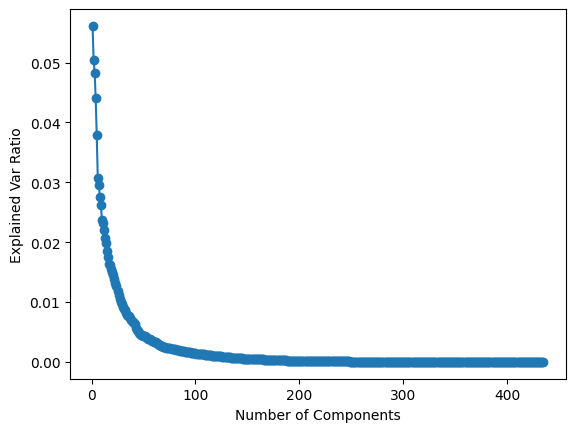

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pick out the category dummy columns for pca and keep the rest columns as original
category_columns = [col for col in df_pca.columns if col.startswith('category_')]
df_category = df_pca[category_columns]

# Use PCA explain variance ratio to pick the best number of components to keep
pca = PCA()
pca.fit(df_category)
explain_var_ratio = pca.explained_variance_ratio_

#Plot the explain ratio 
plt.plot(range(1, len(explain_var_ratio) +1), explain_var_ratio, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Var Ratio')
plt.show()

In [ ]:
# It's to hard to find the best choice from the plot above, let use another way to pick the number of components
import numpy as np

cumulative_explained_variance_ratio = np.cumsum(explain_var_ratio)
optimal_n_components = np.argmax(cumulative_explained_variance_ratio >= 0.95) + 1
optimal_n_components

118

In [ ]:
pca = PCA(n_components=optimal_n_components)
pca_result = pca.fit_transform(df_category)

# Create a DataFrame with the PCA results
df_pca_dummy = pd.DataFrame(pca_result, columns=[f"PCA{i+1}" for i in range(optimal_n_components)])

# Replace the category dummy columns with the PCA columns in df1
df_pca.drop(category_columns, axis=1, inplace=True)
df_pca = pd.concat([df_pca, df_pca_dummy], axis=1)

df_pca.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,...,PCA109,PCA110,PCA111,PCA112,PCA113,PCA114,PCA115,PCA116,PCA117,PCA118
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000942,2.853831e-06,-0.000563,-0.000389,-0.001204,0.000710,-0.000687,-0.000636,-0.000420,-0.000992
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.014720,-1.783147e-03,-0.009240,-0.005039,-0.015322,0.007790,-0.010465,-0.005962,-0.004072,-0.011785
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000486,1.363672e-06,-0.000292,-0.000204,-0.000625,0.000371,-0.000358,-0.000333,-0.000221,-0.000520
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000189,5.079924e-07,-0.000114,-0.000080,-0.000244,0.000145,-0.000140,-0.000131,-0.000087,-0.000204
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,...,-0.000129,3.444538e-07,-0.000078,-0.000055,-0.000167,0.000099,-0.000096,-0.000090,-0.000060,-0.000140


In [ ]:
df_pca['Merchant Category PCA'] = df_pca_dummy.idxmax(axis=1)

# Remove the PCA columns from df1
df_pca.drop(df_pca_dummy.columns, axis=1, inplace=True)

# Display the updated DataFrame
df_pca.head(10)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1
5,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",PCA16
6,201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5
7,201307,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,FAST FOOD RESTAURANTS,PCA29
8,201307,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",PCA75
9,201307,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,TELECOMMUNICATION SERVICES,PCA10


##### In order to make the PCA result more explainable, a table that map each original merchant category (Merchant Category Code (MCC)) to PCA component (Merchant Category PCA).
##### Since there are 435 different unique original merchant categories which are hard to be displayed in a single table or plot here. Thus there are also two search tools that allow audience to search the connection between original categoriesand PCA coponents.

In [ ]:
# Remove duplicate categories from the 'Merchant Category Code (MCC)' column
unique_categories = df_pca['Merchant Category Code (MCC)'].drop_duplicates()

# Create a table to display the connection between original categories and PCA components
category_pca_table = pd.DataFrame({
    'Original Category': unique_categories,
    'PCA Component': df_pca.loc[unique_categories.index, 'Merchant Category PCA']
})

category_pca_table.reset_index(drop=True, inplace=True)

# Display the table
print(category_pca_table)

                                     Original Category PCA Component
0          CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS         PCA31
1                                             SHERATON         PCA91
2    DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...         PCA23
3                      GROCERY STORES,AND SUPERMARKETS          PCA5
4    STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...          PCA1
..                                                 ...           ...
430                     SILVER LEGACY HOTEL AND CASINO         PCA43
431                           BALLY'S HOTEL AND CASINO         PCA43
432                                    ROYAL AIR MAROC         PCA43
433                                    JAPAN AIR LINES         PCA43
434     COURT COST INCLUDING ALIMONY AND CHILD SUPPORT         PCA43

[435 rows x 2 columns]


In [ ]:
# Search function to find 'Merchant Category PCA' based on 'Merchant Category Code (MCC)'
def search_pca_by_category(category_code):
    result = category_pca_table.loc[category_pca_table['Original Category'] == category_code, 'PCA Component']
    if not result.empty:
        return result.values[0]
    else:
        return 'Category not found'

# Search function to find 'Merchant Category Code (MCC)' based on 'Merchant Category PCA'
def search_category_by_pca(pca_component):
    result = category_pca_table.loc[category_pca_table['PCA Component'] == pca_component, 'Original Category']
    if not result.empty:
        return result.values[0]
    else:
        return 'PCA component not found'

##### Here are the search tools

In [ ]:
# Use Merchant Category Code (MCC) to search the PCA componennt
category_code = 'CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS'  # Here is just an example, please enter the PCA component you want to search
pca_component = search_pca_by_category(category_code)
print(f"PCA Component for Category '{category_code}': {pca_component}")

PCA Component for Category 'CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS': PCA31


In [ ]:
# Use PCA componennt to search the Merchant Category Code (MCC)
pca_component = 'PCA1'  # Here is just an example, please enter the PCA component you want to search
category_code = search_category_by_pca(pca_component)
print(f"Category for PCA Component '{pca_component}': {category_code}")

Category for PCA Component 'PCA1': STATIONERY, OFFICE SUPPLIES, PRINTING AND WRITING PAPER


### Create detection feature based on the new PCA Merchant Category components

In [ ]:
detect_by_pca_merchant = df_pca.groupby(['Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Merchant Category PCA')
detect_by_pca_merchant

,Average_Amount
Merchant Category PCA,
PCA1,204.915215
PCA10,320.095624
PCA100,200.758791
PCA101,842.595726
PCA102,110.226395
...,...
PCA94,861.002171
PCA95,592.925636
PCA97,810.266566


#### 11 Abnormal Ratio of Amount towards Avergae Amount of each PCA Category

In [ ]:
# add the new feature average spending to the dataset 
df_pca1 = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Merchant Category PCA'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df_pca1['merchant_avg_ratio_amount'] = np.where(df_pca1['Average_Amount']==0,0, df_pca1['Amount'] / df_pca1['Average_Amount'])
df_pca1['merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          1.000000
std           4.479044
min        -224.300722
25%           0.131174
50%           0.392593
75%           0.928855
max         932.594037
Name: merchant_avg_ratio_amount, dtype: float64

In [ ]:
# cut by percentile for plotting
var = 'merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_pca1[binned_var] = pd.qcut(df_pca1[var],percentile)
df_pca1[['merchant_avg_ratio_amount_D']]

,merchant_avg_ratio_amount_D
0,"(1.133, 3.486]"
1,"(0.393, 1.133]"
2,"(0.0976, 0.393]"
3,"(1.133, 3.486]"
4,"(0.393, 1.133]"
...,...
442453,"(1.133, 3.486]"
442454,"(3.486, 9.667]"
442455,"(0.0976, 0.393]"
442456,"(9.667, 932.594]"


[Text(0, 0, '(-224.302, -0.533]'),
 Text(1, 0, '(-0.533, 0.0133]'),
 Text(2, 0, '(0.0133, 0.0976]'),
 Text(3, 0, '(0.0976, 0.393]'),
 Text(4, 0, '(0.393, 1.133]'),
 Text(5, 0, '(1.133, 3.486]'),
 Text(6, 0, '(3.486, 9.667]'),
 Text(7, 0, '(9.667, 932.594]')]

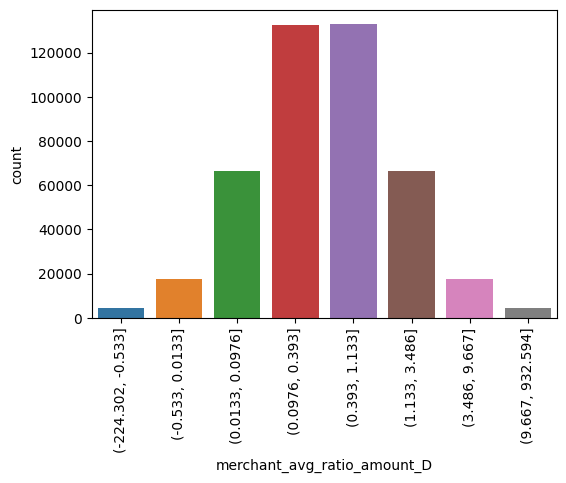

In [ ]:
# Use a plot to show the distribution of each percentile range
import seaborn as sns

plt.figure(figsize=(6,4))
g = sns.countplot(x="merchant_avg_ratio_amount_D", data=df_pca1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

##### We can tell from the plot that amounts with ratio over 9.637 seem to be potential anomalies(fraud).Let's check how many potential fraud we can detect based on the feature we create and use here.

In [ ]:
df_pca1[df_pca1['merchant_avg_ratio_amount'] > 9.637]['Amount'].count()

4451

In [ ]:
df_pca1[df_pca1['merchant_avg_ratio_amount'] > 9.637]['Amount'].count() / df_pca1['Amount'].count()

0.01005971188225775

##### About 1% of the transactions (4426) were identified as potentially fraudulent, which seems reasonable but not guarenteed, we still need more insights or domain knowledge to explore this result.

#### About this feature:
##### This feature is mainly a transformed version of Merchant Category Code, firstly dummy varibaled of merchant categories are created and then merged to a single column(variable) as a new category variable. The reason of doing PCA on original merchant is that there were 435 different merchant category in original data, and more than half of them only occurred very few times, less than the average occurrance number over all categories. This might lead these less-occurs categories as unefficient variables or lease to overfitting of final prediction model. To deal with, it is a good idea to convert these 435 categories to a fewer number of coponents, and PCA is oen of the best choice since this is an unsupervised learning. While choosing the number of components we finally wnat to keep, I calculate with the purpose that these PCA components can repersent at least 95% information of the original categories, and the result of component number is 118. 
##### This is the very first step of feature engineering based on merchat component, with the measurement (average transaction amount per time) these abnormal transaction, like 10 times of average amount of that category will be recoganized as potential fraud. But it also has its limitation, merchant category is a very wide category, the prise or the amount buying can be varius case by case. Thus there will have some more complicated features be built based on the idea of PCA merchant category after.  

#### 12 Agency + Merchant Category PCA Components

In [ ]:
# Similiar to above amount mean, but add 'Agency Name' 

detect_by_pca_merchant = df_pca.groupby(['Agency Name', 'Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Agency Name')
detect_by_pca_merchant

Average_Amount
Agency Name                     Merchant Category PCA                
ARDMORE HIGHER EDUCATION CENTER PCA105                     113.492000
                                PCA93                      153.450000
                                PCA7                       110.559231
                                PCA6                        11.640000
                                PCA52                      750.170000
...                                                               ...
`DEPARTMENT OF EDUCATION        PCA34                      417.158333
                                PCA35                      317.408571
                                PCA36                      615.901667
                                PCA38                      544.733333
                                PCA95                      646.219000

[5985 rows x 1 columns]

###### * Please note that not all PCA components will be included in every Agency

In [ ]:
# add the new feature average spending to the dataset 
df_pca_agency = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Agency Name', 'Merchant Category PCA'])
df_pca_agency
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df_pca_agency['agency_merchant_avg_ratio_amount'] = np.where(df_pca_agency['Average_Amount']==0,0, df_pca_agency['Amount'] / df_pca_agency['Average_Amount'])
df_pca_agency['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999862
std           7.238366
min       -2735.680000
25%           0.172363
50%           0.499521
75%           1.093535
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

In [ ]:
# Cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_pca_agency[binned_var] = pd.qcut(df_pca_agency[var],percentile)
df_pca_agency[['agency_merchant_avg_ratio_amount_D']]

,agency_merchant_avg_ratio_amount_D
0,"(1.291, 3.563]"
1,"(0.5, 1.291]"
2,"(0.132, 0.5]"
3,"(1.291, 3.563]"
4,"(0.132, 0.5]"
...,...
442453,"(0.5, 1.291]"
442454,"(0.132, 0.5]"
442455,"(0.0206, 0.132]"
442456,"(8.831, 2735.68]"


[Text(0, 0, '(-2735.681, -0.654]'),
 Text(1, 0, '(-0.654, 0.0206]'),
 Text(2, 0, '(0.0206, 0.132]'),
 Text(3, 0, '(0.132, 0.5]'),
 Text(4, 0, '(0.5, 1.291]'),
 Text(5, 0, '(1.291, 3.563]'),
 Text(6, 0, '(3.563, 8.831]'),
 Text(7, 0, '(8.831, 2735.68]')]

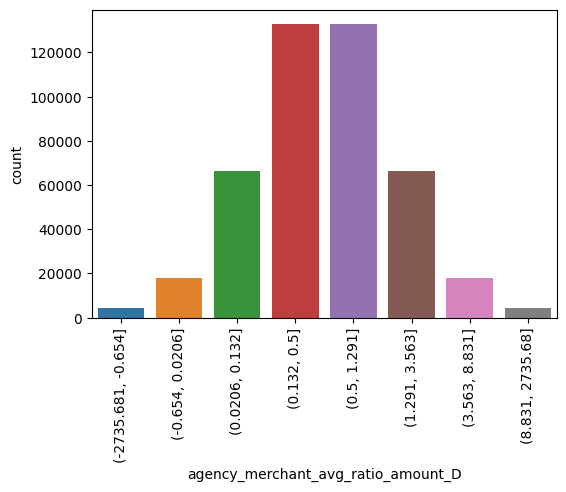

In [ ]:
# Use a plot to show the distribution of each percentile range

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df_pca_agency)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
print(df_pca_agency[df_pca_agency['agency_merchant_avg_ratio_amount'] > 9.637]['Amount'].count())

print(df_pca_agency[df_pca_agency['agency_merchant_avg_ratio_amount'] > 9.637]['Amount'].count() / df_pca_agency['Amount'].count())

3610
0.008158966500775215


#### About this feature:
##### This feature is a combination of PCA merchant category and agency. Addition to the trend of each PCA category, this feature can also capture and repersent the transaction trend of each agency. For example, there might be a few agency that always spend a lot of money on every merchant category, and this can be 10 times more than the average of this category overall. Under this situation, with simple PCA categoty feature, the transactions will be detected as potential frauds, unless we consider the agency trends as this new feature. And it will still capture abnormal transactions if an agency spends much more than it used to on same categories. 

#### 13 Customer(Full Name) + Merchant Category PCA Components

##### It might be better to add a full name column to avoid any conflict by the seprated First and last name
##### * Please notice that there is still risk of same First initila and Last name repersent different cardholders.

In [ ]:
# Combine first and last name

df_pca['Cardholder_Full_Name'] = df_pca['Cardholder First Initial'] + ' ' + df_pca['Cardholder Last Name']

df_pca.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA,Full_Name,Cardholder_Full_Name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31,C Mason,C Mason
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91,C Mason,C Mason
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23,J Massey,J Massey
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5,T Massey,T Massey
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1,M Mauro-Herrera,M Mauro-Herrera


In [ ]:
# Similiar to above amount mean, but change to 'Cardholder Name' 

detect_by_pca_merchant = df_pca.groupby(['Cardholder_Full_Name', 'Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Cardholder_Full_Name')
detect_by_pca_merchant

Average_Amount
Cardholder_Full_Name Merchant Category PCA                
1 15000              PCA65                     4626.460000
2 24100              PCA65                      278.409000
4 42000              PCA65                      133.998125
4 44600              PCA65                      111.990000
4 48000              PCA65                       96.774615
...                                                    ...
s russell            PCA25                      568.000000
                     PCA117                      94.220000
                     PCA9                        25.000000
                     PCA40                       77.000000
                     PCA95                       49.020000

[64586 rows x 1 columns]

In [ ]:
# Add the new feature average spending to the dataset 
df_pca_cardholder = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Cardholder_Full_Name', 'Merchant Category PCA'])
df_pca_cardholder
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df_pca_cardholder['cardholder_merchant_avg_ratio_amount'] = np.where(df_pca_cardholder['Average_Amount']==0,0, df_pca_cardholder['Amount'] / df_pca_cardholder['Average_Amount'])
df_pca_cardholder['cardholder_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.920508e-01
std      4.239764e+15
min     -7.901622e+17
25%      3.401484e-01
50%      8.174877e-01
75%      1.206218e+00
max      7.901622e+17
Name: cardholder_merchant_avg_ratio_amount, dtype: float64

In [ ]:
# Cut by percentile for plotting
var = 'cardholder_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_pca_cardholder[binned_var] = pd.qcut(df_pca_cardholder[var],percentile)
df_pca_cardholder[['cardholder_merchant_avg_ratio_amount_D']]

,cardholder_merchant_avg_ratio_amount_D
0,"(0.817, 1.396]"
1,"(1.396, 2.921]"
2,"(0.0357, 0.255]"
3,"(1.396, 2.921]"
4,"(1.396, 2.921]"
...,...
442453,"(0.255, 0.817]"
442454,"(0.0357, 0.255]"
442455,"(-0.916, 0.0357]"
442456,"(2.921, 5.857]"


[Text(0, 0, '(-7.901621841216878e+17, -0.916]'),
 Text(1, 0, '(-0.916, 0.0357]'),
 Text(2, 0, '(0.0357, 0.255]'),
 Text(3, 0, '(0.255, 0.817]'),
 Text(4, 0, '(0.817, 1.396]'),
 Text(5, 0, '(1.396, 2.921]'),
 Text(6, 0, '(2.921, 5.857]'),
 Text(7, 0, '(5.857, 7.901621841216878e+17]')]

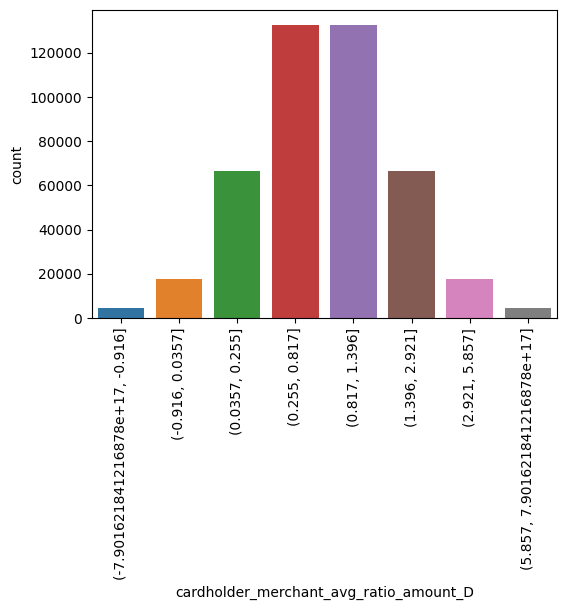

In [ ]:
# Use a plot to show the distribution of each percentile range

plt.figure(figsize=(6,4))
g = sns.countplot(x="cardholder_merchant_avg_ratio_amount_D", data=df_pca_agency)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
print(df_pca_cardholder[df_pca_cardholder['cardholder_merchant_avg_ratio_amount'] > 5.857]['Amount'].count())

print(df_pca_cardholder[df_pca_cardholder['cardholder_merchant_avg_ratio_amount'] > 5.857]['Amount'].count() / df_pca_cardholder['Amount'].count())

4426
0.01000320934416374


#### About this feature:
##### This feature is quite similiar to the above agency merchant category feature, but switch the focus from each agency to each cardholder (combination of first initial and last name). Same as agency, individual person has his/her own consumption habit. A person may always spend more on certain categories or all categories, this feature will capture this trends and lower the false positive rate. But it will still detect sudden change on transaction amount.

#### 14 Time Series + Merchant Category

In [ ]:
# Convert the 'Year_month' column to datetime type for timeseries analysis

df_pca['Year-Month'] = pd.to_datetime(df_pca['Year-Month'], format = '%Y%m').dt.to_period('M')

df_pca.head(10)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA
0,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31
1,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91
2,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23
3,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5
4,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1
5,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",PCA16
6,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,19.87,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5
7,2013-07,1000,OKLAHOMA STATE UNIVERSITY,Mays,B,GENERAL PURCHASE,10.10,DAYLIGHT DONUTS,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,FAST FOOD RESTAURANTS,PCA29
8,2013-07,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",PCA75
9,2013-07,1000,OKLAHOMA STATE UNIVERSITY,McClurg,L,AT&T SERVICE PAYMENT ITM,29.99,AT&T DATA,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,TELECOMMUNICATION SERVICES,PCA10


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_pca['Year-Month'] = df_pca['Year-Month'].dt.to_timestamp()

# Perform seasonal decomposition for each unique PCA component and year-month combination
trend_components = []
seasonal_components = []

unique_pca_components = df_pca['Merchant Category PCA'].unique()

for pca_component in unique_pca_components:
    component_data = df_pca[df_pca['Merchant Category PCA'] == pca_component]['Year-Month']
    decomposition = seasonal_decompose(component_data, model='additive', period=12)
    
    seasonal_component = decomposition.seasonal
    
    seasonal_components.append(seasonal_component)

# Combine the trend and seasonal components into a single feature
new_feature = pd.concat([pd.concat(seasonal_components)], axis=1)
new_feature.columns = ['Seasonal']

# Append the new feature back to the original DataFrame
df_MerchantCategory_Timeseries = pd.concat([df_pca, new_feature], axis=1)

df_MerchantCategory_Timeseries.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),Merchant Category PCA,Seasonal
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,PCA31,4.699920e+13
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON,PCA91,-4.548303e+13
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,PCA23,8.115514e+13
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS",PCA5,-4.599019e+13
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",PCA1,2.800151e+13


#### About this feature:
##### This feature can potentially help in detecting fraud by capturing the recurring patterns or anomalies that occur within specific months of the year for each category as below:

##### Identify unusual patterns: 
#####   The seasonal component captures the repetitive patterns or seasonality within the past transaction. It provides information about regular fluctuations that occur within specific months of the year. Unusual or unexpected deviations from these regular patterns may indicate potential fraud.

##### Identify abnormal behavior: 
#####   The seasonal component can highlight abnormal behavior that deviates significantly from the expected seasonal pattern. If certain months exhibit unusual spikes or dips in activity compared to the normal seasonal behavior, it may indicate fraudulent activity.

#### 15 PCA Merchant Category + Vendor

In [ ]:
# Similiar to above amount mean, but change to 'Vendor' 

detect_by_pca_merchant = df_pca.groupby(['Vendor', 'Merchant Category PCA'])['Amount'].mean()
detect_by_pca_merchant = pd.DataFrame(detect_by_pca_merchant)
detect_by_pca_merchant.columns = ['Average_Amount']
detect_by_pca_merchant = detect_by_pca_merchant.sort_values('Vendor')
detect_by_pca_merchant

,,Average_Amount
Vendor,Merchant Category PCA,
#1 PARTY SUPPLIES,PCA6,347.060000
#101 BLUE CORN,PCA28,379.210000
#15 VS,PCA2,58.435000
#17 VS,PCA2,128.900000
#18 VS,PCA2,137.872000
...,...,...
www.molport.com,PCA26,205.000000
www.sublimevideo.net,PCA50,18.188333
www.testking.com,PCA12,99.990000


In [ ]:
# Add the new feature average spending to the dataset 
df_pca_vendor = pd.merge(df_pca, detect_by_pca_merchant, how='left', on=['Vendor', 'Merchant Category PCA'])
df_pca_vendor
# Feature 1: ratio of amount spending and avergae spending by merchant category + Vendor 
df_pca_vendor['vendor_merchant_avg_ratio_amount'] = np.where(df_pca_vendor['Average_Amount']==0,0, df_pca_vendor['Amount'] / df_pca_vendor['Average_Amount'])
df_pca_vendor['vendor_merchant_avg_ratio_amount'].describe()

# Cut by percentile for plotting
var = 'vendor_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df_pca_vendor[binned_var] = pd.qcut(df_pca_vendor[var],percentile)
df_pca_vendor[['vendor_merchant_avg_ratio_amount_D']]

,vendor_merchant_avg_ratio_amount_D
0,"(1.205, 2.965]"
1,"(1.205, 2.965]"
2,"(0.793, 1.205]"
3,"(1.205, 2.965]"
4,"(0.793, 1.205]"
...,...
442453,"(0.0339, 0.207]"
442454,"(1.205, 2.965]"
442455,"(0.207, 0.793]"
442456,"(6.977, 5.413608227076047e+16]"


[Text(0, 0, '(-1.8045360756920156e+16, -0.468]'),
 Text(1, 0, '(-0.468, 0.0339]'),
 Text(2, 0, '(0.0339, 0.207]'),
 Text(3, 0, '(0.207, 0.793]'),
 Text(4, 0, '(0.793, 1.205]'),
 Text(5, 0, '(1.205, 2.965]'),
 Text(6, 0, '(2.965, 6.977]'),
 Text(7, 0, '(6.977, 5.413608227076047e+16]')]

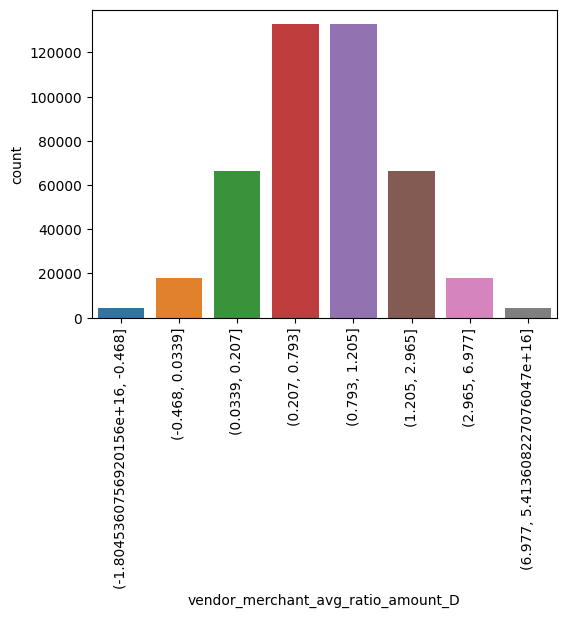

In [ ]:
# Use a plot to show the distribution of each percentile range

plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_merchant_avg_ratio_amount_D", data=df_pca_vendor)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### About this Feature:
##### You may notice that vendors are like more segmented categories, there could be several vendors under same merchant category and more under same merchant category PCA component. Thus this feature is created to capture the transaction trends of each vendor among each PCA component, to provided more accurate and sensitive detection to frauds. Since the price of services or products provided by each vendor shall be relatively close, and a sudden huge amount of transaction of a vendor might be potential fraud.

In [41]:
%%shell
jupyter nbconvert --to html /content/Assignment_2_Zhengxi_Shen.ipynb

[NbConvertApp] Converting notebook /content/Assignment_2_Zhengxi_Shen.ipynb to html
[NbConvertApp] Writing 1244201 bytes to /content/Assignment_2_Zhengxi_Shen.html
